In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
import pickle
import joblib

In [2]:
file = 'ML AE1 Dataset.csv' #file containing data
df = pd.read_csv(file) #create initial df
df2 = df.drop(columns=['Patient Number']) #drop irrelevant column from df
display(df2)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
116,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression


In [3]:
label_encoder = LabelEncoder() #using label encoder to convert categorical labels into numerical labels
df_encoded = df2.copy()

for column in df_encoded.columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column]) #iterate through df to transform labels

display(df_encoded)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,2,0,0,1,0,0,1,1,1,2,2,3,1
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,2
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,0
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,1
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,3,2,0,1,0,0,1,0,1,0,0,1,1,4,2,2
116,2,2,2,1,1,0,0,0,0,1,0,0,0,1,5,6,7,0
117,3,2,3,2,1,0,1,1,0,0,0,1,0,1,0,4,2,1
118,3,2,1,1,0,1,1,0,1,1,1,0,1,1,6,6,6,2


In [4]:
df_final = df_encoded.dropna() #drop rows with missing values
df_final

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,2,0,0,1,0,0,1,1,1,2,2,3,1
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,2
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,0
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,1
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,3,2,0,1,0,0,1,0,1,0,0,1,1,4,2,2
116,2,2,2,1,1,0,0,0,0,1,0,0,0,1,5,6,7,0
117,3,2,3,2,1,0,1,1,0,0,0,1,0,1,0,4,2,1
118,3,2,1,1,0,1,1,0,1,1,1,0,1,1,6,6,6,2


In [5]:
#assign all columns except the last one (label column) to X
X = df_final.iloc[:, :-1]

#assign the label column to y
y = df_final['Expert Diagnose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
#scale data for TabNet
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
#initialize TabNetClassifier
tabnet_clf = TabNetClassifier()

#train model
tabnet_clf.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

#predict
y_pred = tabnet_clf.predict(X_test)

#inverse transform the predictions and true labels to original labels
y_pred_og = label_encoder.inverse_transform(y_pred)
y_test_og = label_encoder.inverse_transform(y_test)

#print classification report
report = classification_report(y_test_og, y_pred_og)
print(report)

/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.58851 | train_accuracy: 0.25556 | valid_accuracy: 0.23333 |  0:00:00s
epoch 1  | loss: 1.38227 | train_accuracy: 0.25556 | valid_accuracy: 0.2     |  0:00:00s
epoch 2  | loss: 1.32003 | train_accuracy: 0.27778 | valid_accuracy: 0.23333 |  0:00:00s
epoch 3  | loss: 1.15529 | train_accuracy: 0.3     | valid_accuracy: 0.23333 |  0:00:00s
epoch 4  | loss: 1.10122 | train_accuracy: 0.33333 | valid_accuracy: 0.23333 |  0:00:00s
epoch 5  | loss: 1.05475 | train_accuracy: 0.33333 | valid_accuracy: 0.3     |  0:00:00s
epoch 6  | loss: 0.98493 | train_accuracy: 0.38889 | valid_accuracy: 0.33333 |  0:00:00s
epoch 7  | loss: 0.93231 | train_accuracy: 0.36667 | valid_accuracy: 0.3     |  0:00:00s
epoch 8  | loss: 0.87627 | train_accuracy: 0.35556 | valid_accuracy: 0.3     |  0:00:00s
epoch 9  | loss: 0.83247 | train_accuracy: 0.37778 | valid_accuracy: 0.43333 |  0:00:00s
epoch 10 | loss: 0.78509 | train_accuracy: 0.41111 | valid_accuracy: 0.46667 |  0:00:00s
epoch 11 | loss: 0.72

/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [8]:
#define the parameter distribution for random search
param_dist = {
    'n_d': [8, 16, 32, 64],
    'n_a': [8, 16, 32, 64],
    'n_steps': [3, 5, 7, 10],
    'gamma': uniform(1.0, 2.0),
    'lambda_sparse': uniform(0.0001, 0.01),
    'optimizer_params': [{'lr': 0.001}, {'lr': 0.01}, {'lr': 0.02}, {'lr': 0.05}]
}


#initialize randomized search
random_search = RandomizedSearchCV(estimator=tabnet_clf, param_distributions=param_dist, scoring='accuracy', cv=5, n_jobs=-1, n_iter=50, random_state=42)

#fit randomized search
random_search.fit(X_train, y_train)

#select best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/r

epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
epoch 6  | loss: 0.0     |  0:00:00s
epoch 7  | loss: 0.0     |  0:00:00s
epoch 8  | loss: 0.0     |  0:00:00s
epoch 9  | loss: 0.0     |  0:00:00s
epoch 10 | loss: 0.0     |  0:00:00s
epoch 11 | loss: 0.0     |  0:00:00s
epoch 12 | loss: 0.0     |  0:00:00s
epoch 13 | loss: 0.0     |  0:00:00s
epoch 14 | loss: 0.0     |  0:00:00s
epoch 15 | loss: 0.0     |  0:00:00s
epoch 16 | loss: 0.0     |  0:00:00s
epoch 17 | loss: 0.0     |  0:00:00s
epoch 18 | loss: 0.0     |  0:00:00s
epoch 19 | loss: 0.0     |  0:00:00s
epoch 20 | loss: 0.0     |  0:00:00s
epoch 21 | loss: 0.0     |  0:00:00s
epoch 22 | loss: 0.0     |  0:00:00s
epoch 23 | loss: 0.0     |  0:00:00s
epoch 24 | loss: 0.0     |  0:00:00s
epoch 25 | loss: 0.0     |  0:00:00s
epoch 26 | loss: 0.0     |  0:00:00s
e

/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.


epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
epoch 6  | loss: 0.0     |  0:00:00s
epoch 7  | loss: 0.0     |  0:00:00s
epoch 8  | loss: 0.0     |  0:00:00s
epoch 9  | loss: 0.0     |  0:00:00s
epoch 10 | loss: 0.0     |  0:00:00s
epoch 11 | loss: 0.0     |  0:00:00s
epoch 12 | loss: 0.0     |  0:00:00s
epoch 13 | loss: 0.0     |  0:00:00s
epoch 14 | loss: 0.0     |  0:00:00s
epoch 15 | loss: 0.0     |  0:00:00s
epoch 16 | loss: 0.0     |  0:00:00s
epoch 17 | loss: 0.0     |  0:00:00s
epoch 18 | loss: 0.0     |  0:00:00s
epoch 19 | loss: 0.0     |  0:00:00s
epoch 20 | loss: 0.0     |  0:00:00s
epoch 21 | loss: 0.0     |  0:00:00s
epoch 22 | loss: 0.0     |  0:00:00s
epoch 23 | loss: 0.0     |  0:00:00s
epoch 24 | loss: 0.0     |  0:00:00s
epoch 25 | loss: 0.0     |  0:00:00s
epoch 26 | loss: 0.0     |  0:00:00s
e

/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.


0.0     |  0:00:00s
epoch 60 | loss: 0.0     |  0:00:00s
epoch 61 | loss: 0.0     |  0:00:00s
epoch 62 | loss: 0.0     |  0:00:00s
epoch 63 | loss: 0.0     |  0:00:00s
epoch 64 | loss: 0.0     |  0:00:00s
epoch 65 | loss: 0.0     |  0:00:00s
epoch 66 | loss: 0.0     |  0:00:00s
epoch 67 | loss: 0.0     |  0:00:00s
epoch 68 | loss: 0.0     |  0:00:00s
epoch 69 | loss: 0.0     |  0:00:00s
epoch 70 | loss: 0.0     |  0:00:00s
epoch 71 | loss: 0.0     |  0:00:00s
epoch 72 | loss: 0.0     |  0:00:00s
epoch 73 | loss: 0.0     |  0:00:00s
epoch 74 | loss: 0.0     |  0:00:00s
epoch 75 | loss: 0.0     |  0:00:00s
epoch 76 | loss: 0.0     |  0:00:00s
epoch 77 | loss: 0.0     |  0:00:00s
epoch 78 | loss: 0.0     |  0:00:00s
epoch 79 | loss: 0.0     |  0:00:00s
epoch 80 | loss: 0.0     |  0:00:00s
epoch 81 | loss: 0.0     |  0:00:00s
epoch 82 | loss: 0.0     |  0:00:00s
epoch 83 | loss: 0.0     |  0:00:00s
epoch 84 | loss: 0.0     |  0:00:00s
epoch 85 | loss: 0.0     |  0:00:00s
epoch 86 | loss: 0

/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.


epoch 84 | loss: 0.0     |  0:00:00s
epoch 85 | loss: 0.0     |  0:00:00s
epoch 86 | loss: 0.0     |  0:00:00s
epoch 87 | loss: 0.0     |  0:00:00s
epoch 88 | loss: 0.0     |  0:00:00s
epoch 89 | loss: 0.0     |  0:00:00s
epoch 90 | loss: 0.0     |  0:00:00s
epoch 91 | loss: 0.0     |  0:00:00s
epoch 92 | loss: 0.0     |  0:00:00s
epoch 93 | loss: 0.0     |  0:00:00s
epoch 94 | loss: 0.0     |  0:00:00s
epoch 95 | loss: 0.0     |  0:00:00s
epoch 96 | loss: 0.0     |  0:00:00s
epoch 97 | loss: 0.0     |  0:00:00s
epoch 98 | loss: 0.0     |  0:00:00s
epoch 99 | loss: 0.0     |  0:00:00s
epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
epoch 6  | loss: 0.0     |  0:00:00s
epoch 7  | loss: 0.0     |  0:00:00s
epoch 8  | loss: 0.0     |  0:00:00s
epoch 9  | loss: 0.0     |  0:00:00s
epoch 10 | loss: 0.0     |  0:00:00s
e

/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.


epoch 84 | loss: 0.0     |  0:00:00s
epoch 85 | loss: 0.0     |  0:00:00s
epoch 86 | loss: 0.0     |  0:00:00s
epoch 87 | loss: 0.0     |  0:00:00s
epoch 88 | loss: 0.0     |  0:00:00s
epoch 89 | loss: 0.0     |  0:00:00s
epoch 90 | loss: 0.0     |  0:00:00s
epoch 91 | loss: 0.0     |  0:00:00s
epoch 92 | loss: 0.0     |  0:00:00s
epoch 93 | loss: 0.0     |  0:00:00s
epoch 94 | loss: 0.0     |  0:00:00s
epoch 95 | loss: 0.0     |  0:00:00s
epoch 96 | loss: 0.0     |  0:00:00s
epoch 97 | loss: 0.0     |  0:00:00s
epoch 98 | loss: 0.0     |  0:00:00s
epoch 99 | loss: 0.0     |  0:00:00s
epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
epoch 6  | loss: 0.0     |  0:00:00s
epoch 7  | loss: 0.0     |  0:00:00s
epoch 8  | loss: 0.0     |  0:00:00s
epoch 9  | loss: 0.0     |  0:00:00s
epoch 10 | loss: 0.0     |  0:00:00s
e

/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.


epoch 26 | loss: 0.0     |  0:00:00s
epoch 27 | loss: 0.0     |  0:00:00s
epoch 28 | loss: 0.0     |  0:00:00s
epoch 29 | loss: 0.0     |  0:00:00s
epoch 30 | loss: 0.0     |  0:00:00s
epoch 31 | loss: 0.0     |  0:00:00s
epoch 32 | loss: 0.0     |  0:00:00s
epoch 33 | loss: 0.0     |  0:00:00s
epoch 34 | loss: 0.0     |  0:00:00s
epoch 35 | loss: 0.0     |  0:00:00s
epoch 36 | loss: 0.0     |  0:00:00s
epoch 37 | loss: 0.0     |  0:00:00s
epoch 38 | loss: 0.0     |  0:00:00s
epoch 39 | loss: 0.0     |  0:00:00s
epoch 40 | loss: 0.0     |  0:00:00s
epoch 41 | loss: 0.0     |  0:00:00s
epoch 42 | loss: 0.0     |  0:00:00s
epoch 43 | loss: 0.0     |  0:00:00s
epoch 44 | loss: 0.0     |  0:00:00s
epoch 45 | loss: 0.0     |  0:00:00s
epoch 46 | loss: 0.0     |  0:00:00s
epoch 47 | loss: 0.0     |  0:00:00s
epoch 48 | loss: 0.0     |  0:00:00s
epoch 49 | loss: 0.0     |  0:00:00s
epoch 50 | loss: 0.0     |  0:00:00s
epoch 51 | loss: 0.0     |  0:00:00s
epoch 52 | loss: 0.0     |  0:00:00s
e

/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.


epoch 68 | loss: 0.0     |  0:00:00s
epoch 69 | loss: 0.0     |  0:00:00s
epoch 70 | loss: 0.0     |  0:00:00s
epoch 71 | loss: 0.0     |  0:00:00s
epoch 72 | loss: 0.0     |  0:00:00s
epoch 73 | loss: 0.0     |  0:00:00s
epoch 74 | loss: 0.0     |  0:00:00s
epoch 75 | loss: 0.0     |  0:00:00s
epoch 76 | loss: 0.0     |  0:00:00s
epoch 77 | loss: 0.0     |  0:00:00s
epoch 78 | loss: 0.0     |  0:00:00s
epoch 79 | loss: 0.0     |  0:00:00s
epoch 80 | loss: 0.0     |  0:00:00s
epoch 81 | loss: 0.0     |  0:00:00s
epoch 82 | loss: 0.0     |  0:00:00s
epoch 83 | loss: 0.0     |  0:00:00s
epoch 84 | loss: 0.0     |  0:00:00s
epoch 85 | loss: 0.0     |  0:00:00s
epoch 86 | loss: 0.0     |  0:00:00s
epoch 87 | loss: 0.0     |  0:00:00s
epoch 88 | loss: 0.0     |  0:00:00s
epoch 89 | loss: 0.0     |  0:00:00s
epoch 90 | loss: 0.0     |  0:00:00s
epoch 91 | loss: 0.0     |  0:00:00s
epoch 92 | loss: 0.0     |  0:00:00s
epoch 93 | loss: 0.0     |  0:00:00s
epoch 94 | loss: 0.0     |  0:00:00s
e

/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.


epoch 10 | loss: 0.0     |  0:00:00s
epoch 11 | loss: 0.0     |  0:00:00s
epoch 12 | loss: 0.0     |  0:00:00s
epoch 13 | loss: 0.0     |  0:00:00s
epoch 14 | loss: 0.0     |  0:00:00s
epoch 15 | loss: 0.0     |  0:00:00s
epoch 16 | loss: 0.0     |  0:00:00s
epoch 17 | loss: 0.0     |  0:00:00s
epoch 18 | loss: 0.0     |  0:00:00s
epoch 19 | loss: 0.0     |  0:00:00s
epoch 20 | loss: 0.0     |  0:00:00s
epoch 21 | loss: 0.0     |  0:00:00s
epoch 22 | loss: 0.0     |  0:00:00s
epoch 23 | loss: 0.0     |  0:00:00s
epoch 24 | loss: 0.0     |  0:00:00s
epoch 25 | loss: 0.0     |  0:00:00s
epoch 26 | loss: 0.0     |  0:00:00s
epoch 27 | loss: 0.0     |  0:00:00s
epoch 28 | loss: 0.0     |  0:00:00s
epoch 29 | loss: 0.0     |  0:00:00s
epoch 30 | loss: 0.0     |  0:00:00s
epoch 31 | loss: 0.0     |  0:00:00s
epoch 32 | loss: 0.0     |  0:00:00s
epoch 33 | loss: 0.0     |  0:00:00s
epoch 34 | loss: 0.0     |  0:00:00s
epoch 35 | loss: 0.0     |  0:00:00s
epoch 36 | loss: 0.0     |  0:00:00s
e

/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.


 | loss: 0.0     |  0:00:00s
epoch 69 | loss: 0.0     |  0:00:00s
epoch 70 | loss: 0.0     |  0:00:00s
epoch 71 | loss: 0.0     |  0:00:00s
epoch 72 | loss: 0.0     |  0:00:00s
epoch 73 | loss: 0.0     |  0:00:00s
epoch 74 | loss: 0.0     |  0:00:00s
epoch 75 | loss: 0.0     |  0:00:00s
epoch 76 | loss: 0.0     |  0:00:00s
epoch 77 | loss: 0.0     |  0:00:00s
epoch 78 | loss: 0.0     |  0:00:00s
epoch 79 | loss: 0.0     |  0:00:00s
epoch 80 | loss: 0.0     |  0:00:00s
epoch 81 | loss: 0.0     |  0:00:00s
epoch 82 | loss: 0.0     |  0:00:00s
epoch 83 | loss: 0.0     |  0:00:00s
epoch 84 | loss: 0.0     |  0:00:00s
epoch 85 | loss: 0.0     |  0:00:00s
epoch 86 | loss: 0.0     |  0:00:00s
epoch 87 | loss: 0.0     |  0:00:00s
epoch 88 | loss: 0.0     |  0:00:00s
epoch 89 | loss: 0.0     |  0:00:00s
epoch 90 | loss: 0.0     |  0:00:00s
epoch 91 | loss: 0.0     |  0:00:00s
epoch 92 | loss: 0.0     |  0:00:00s
epoch 93 | loss: 0.0     |  0:00:00s
epoch 94 | loss: 0.0     |  0:00:00s
epoch 95 

In [9]:
#train model with the best parameters
best_tabnet = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_params=best_params['optimizer_params']
)

best_tabnet.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

#predict on the test set
y_pred_random = best_tabnet.predict(X_test)

#inverse transform the predictions and true labels to original labels
y_pred_random_og = label_encoder.inverse_transform(y_pred_random)

/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.52675 | train_accuracy: 0.27778 | valid_accuracy: 0.2     |  0:00:00s
epoch 1  | loss: 2.68288 | train_accuracy: 0.23333 | valid_accuracy: 0.3     |  0:00:00s
epoch 2  | loss: 1.56641 | train_accuracy: 0.25556 | valid_accuracy: 0.3     |  0:00:01s
epoch 3  | loss: 1.6375  | train_accuracy: 0.28889 | valid_accuracy: 0.33333 |  0:00:01s
epoch 4  | loss: 1.10955 | train_accuracy: 0.45556 | valid_accuracy: 0.23333 |  0:00:02s
epoch 5  | loss: 0.73974 | train_accuracy: 0.41111 | valid_accuracy: 0.4     |  0:00:02s
epoch 6  | loss: 0.51295 | train_accuracy: 0.42222 | valid_accuracy: 0.3     |  0:00:02s
epoch 7  | loss: 0.58668 | train_accuracy: 0.55556 | valid_accuracy: 0.3     |  0:00:03s
epoch 8  | loss: 0.54894 | train_accuracy: 0.58889 | valid_accuracy: 0.33333 |  0:00:03s
epoch 9  | loss: 0.33711 | train_accuracy: 0.57778 | valid_accuracy: 0.4     |  0:00:03s
epoch 10 | loss: 0.15826 | train_accuracy: 0.66667 | valid_accuracy: 0.46667 |  0:00:03s
epoch 11 | loss: 0.20

/Users/raylesser/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [10]:
#print classification report
report = classification_report(y_test_og, y_pred_random_og)
print(report)

                precision    recall  f1-score   support

Bipolar Type-1       0.71      1.00      0.83         5
Bipolar Type-2       0.67      0.67      0.67         6
    Depression       1.00      0.67      0.80         9
        Normal       0.82      0.90      0.86        10

      accuracy                           0.80        30
     macro avg       0.80      0.81      0.79        30
  weighted avg       0.83      0.80      0.80        30



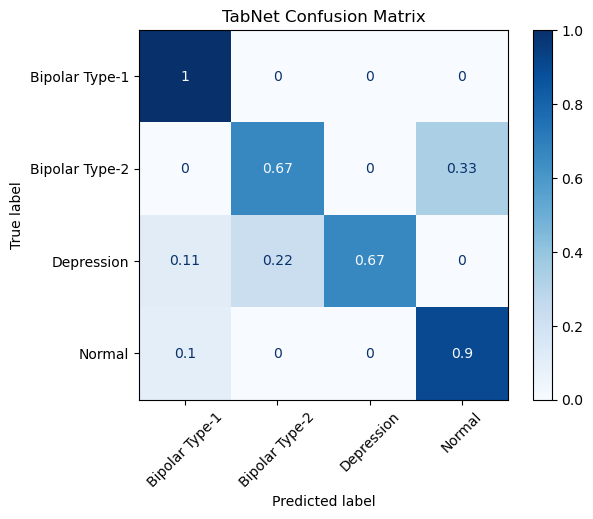

In [11]:
#create normalized confusion matrix
meta_tn_normalized = confusion_matrix(y_test_og, y_pred_random_og, normalize='true')

#display confusion matrix
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=meta_tn_normalized, display_labels=label_encoder.classes_)
disp_normalized.plot(cmap=plt.cm.Blues)
plt.title('TabNet Confusion Matrix')
plt.xticks(rotation=45)
plt.show()

In [12]:
#load the XGBoost model from pkl file
with open('best_xgb.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

In [13]:
#predict with XGBoost
xgb_pred_train = xgb_model.predict_proba(X_train)
xgb_pred_test = xgb_model.predict_proba(X_test)

#predict with TabNet
tabnet_pred_train = best_tabnet.predict_proba(X_train)
tabnet_pred_test = best_tabnet.predict_proba(X_test)

#combine predictions (use all class probabilities)
combined_train = np.hstack((xgb_pred_train, tabnet_pred_train))
combined_test = np.hstack((xgb_pred_test, tabnet_pred_test))

combined_train = scaler.fit_transform(combined_train)
combined_test = scaler.transform(combined_test)

In [14]:
import xgboost as xgb

#train XGBoost meta-model
meta_model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
meta_model_xgb.fit(combined_train, y_train)

#predict on the test set using the XGBoost meta-model
meta_pred_xgb = meta_model_xgb.predict(combined_test)

#inverse transform the predictions and true labels
meta_pred_xgb_og = label_encoder.inverse_transform(meta_pred_xgb)
y_test_og = label_encoder.inverse_transform(y_test)

#print classification report
report_xgb = classification_report(y_test_og, meta_pred_xgb_og)
print(report_xgb)

/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                precision    recall  f1-score   support

Bipolar Type-1       0.71      1.00      0.83         5
Bipolar Type-2       0.67      0.67      0.67         6
    Depression       1.00      0.67      0.80         9
        Normal       0.82      0.90      0.86        10

      accuracy                           0.80        30
     macro avg       0.80      0.81      0.79        30
  weighted avg       0.83      0.80      0.80        30



In [15]:
#train logistic regression meta-model
meta_model_lr = LogisticRegression(max_iter=1000)
meta_model_lr.fit(combined_train, y_train)

#predict
meta_pred_lr = meta_model_lr.predict(combined_test)

#inverse transform labels
meta_pred_og = label_encoder.inverse_transform(meta_pred_lr)

#print classification report
report = classification_report(y_test_og, meta_pred_og)
print(report)

                precision    recall  f1-score   support

Bipolar Type-1       0.71      1.00      0.83         5
Bipolar Type-2       0.67      0.67      0.67         6
    Depression       1.00      0.78      0.88         9
        Normal       0.80      0.80      0.80        10

      accuracy                           0.80        30
     macro avg       0.80      0.81      0.79        30
  weighted avg       0.82      0.80      0.80        30



In [16]:
from sklearn.naive_bayes import GaussianNB

#train Gaussian Naive Bayes meta-model
meta_model_nb = GaussianNB()
meta_model_nb.fit(combined_train, y_train)

#predict
meta_pred_nb = meta_model_nb.predict(combined_test)

#inverse transform the predictions and true labels
meta_pred_og = label_encoder.inverse_transform(meta_pred_nb)

#print classification report
report = classification_report(y_test_og, meta_pred_og)
print(report)

                precision    recall  f1-score   support

Bipolar Type-1       0.83      1.00      0.91         5
Bipolar Type-2       0.60      0.50      0.55         6
    Depression       1.00      0.78      0.88         9
        Normal       0.75      0.90      0.82        10

      accuracy                           0.80        30
     macro avg       0.80      0.79      0.79        30
  weighted avg       0.81      0.80      0.80        30



In [17]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

#define the parameter grid
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 3, 5, 7]
}


#initialize RandomizedSearchCV with XGBoost meta-model
random_search = RandomizedSearchCV(
    estimator=meta_model_xgb, 
    param_distributions=param_distributions, 
    scoring='accuracy', 
    n_iter=100, 
    cv=10, 
    n_jobs=-1, 
    verbose=2, 
    random_state=42
)

#fit RandomizedSearchCV to data
random_search.fit(combined_train, y_train)

#get best parameters and best estimator
best_params = random_search.best_params_
best_meta_model_xgb = random_search.best_estimator_

print(f"Best parameters found: {best_params}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
epoch 52 | loss: 0.0     |  0:00:00s
epoch 53 | loss: 0.0     |  0:00:00s
epoch 54 | loss: 0.0     |  0:00:00s
epoch 55 | loss: 0.0     |  0:00:00s
epoch 56 | loss: 0.0     |  0:00:00s
epoch 57 | loss: 0.0     |  0:00:00s
epoch 58 | loss: 0.0     |  0:00:00s
epoch 59 | loss: 0.0     |  0:00:00s
epoch 60 | loss: 0.0     |  0:00:00s
epoch 61 | loss: 0.0     |  0:00:00s
epoch 62 | loss: 0.0     |  0:00:00s
epoch 63 | loss: 0.0     |  0:00:00s
epoch 64 | loss: 0.0     |  0:00:00s
epoch 65 | loss: 0.0     |  0:00:00s
epoch 66 | loss: 0.0     |  0:00:00s
epoch 67 | loss: 0.0     |  0:00:00s
epoch 68 | loss: 0.0     |  0:00:00s
epoch 69 | loss: 0.0     |  0:00:00s
epoch 70 | loss: 0.0     |  0:00:00s
epoch 71 | loss: 0.0     |  0:00:00s
epoch 72 | loss: 0.0     |  0:00:00s
epoch 73 | loss: 0.0     |  0:00:00s
epoch 74 | loss: 0.0     |  0:00:00s
epoch 75 | loss: 0.0     |  0:00:00s
epoch 76 | loss: 0.0     |  0:00:00s
epoch 77 |

/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

poch 79 | loss: 0.0     |  0:00:00s
epoch 80 | loss: 0.0     |  0:00:00s
epoch 81 | loss: 0.0     |  0:00:00s
epoch 82 | loss: 0.0     |  0:00:00s
epoch 83 | loss: 0.0     |  0:00:00s
epoch 84 | loss: 0.0     |  0:00:00s
epoch 85 | loss: 0.0     |  0:00:00s
epoch 86 | loss: 0.0     |  0:00:00s
epoch 87 | loss: 0.0     |  0:00:00s
epoch 88 | loss: 0.0     |  0:00:00s
epoch 89 | loss: 0.0     |  0:00:00s
epoch 90 | loss: 0.0     |  0:00:00s
epoch 91 | loss: 0.0     |  0:00:00s
epoch 92 | loss: 0.0     |  0:00:00s
epoch 93 | loss: 0.0     |  0:00:00s
epoch 94 | loss: 0.0     |  0:00:00s
epoch 95 | loss: 0.0     |  0:00:00s
epoch 96 | loss: 0.0     |  0:00:00s
epoch 97 | loss: 0.0     |  0:00:00s
epoch 98 | loss: 0.0     |  0:00:00s
epoch 99 | loss: 0.0     |  0:00:00s
epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
ep

/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

epoch 10 | loss: 0.0     |  0:00:00s
epoch 11 | loss: 0.0     |  0:00:00s
epoch 12 | loss: 0.0     |  0:00:00s
epoch 13 | loss: 0.0     |  0:00:00s
epoch 14 | loss: 0.0     |  0:00:00s
epoch 15 | loss: 0.0     |  0:00:00s
epoch 16 | loss: 0.0     |  0:00:00s
epoch 17 | loss: 0.0     |  0:00:00s
epoch 18 | loss: 0.0     |  0:00:00s
epoch 19 | loss: 0.0     |  0:00:00s
epoch 20 | loss: 0.0     |  0:00:00s
epoch 21 | loss: 0.0     |  0:00:00s
epoch 22 | loss: 0.0     |  0:00:00s
epoch 23 | loss: 0.0     |  0:00:00s
epoch 24 | loss: 0.0     |  0:00:00s
epoch 25 | loss: 0.0     |  0:00:00s
epoch 26 | loss: 0.0     |  0:00:00s
epoch 27 | loss: 0.0     |  0:00:00s
epoch 28 | loss: 0.0     |  0:00:00s
epoch 29 | loss: 0.0     |  0:00:00s
epoch 30 | loss: 0.0     |  0:00:00s
epoch 31 | loss: 0.0     |  0:00:00s
epoch 32 | loss: 0.0     |  0:00:00s
epoch 33 | loss: 0.0     |  0:00:00s
epoch 34 | loss: 0.0     |  0:00:00s
epoch 35 | loss: 0.0     |  0:00:00s
epoch 36 | loss: 0.0     |  0:00:00s
e

/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

epoch 52 | loss: 0.0     |  0:00:00s
epoch 53 | loss: 0.0     |  0:00:00s
epoch 54 | loss: 0.0     |  0:00:00s
epoch 55 | loss: 0.0     |  0:00:00s
epoch 56 | loss: 0.0     |  0:00:00s
epoch 57 | loss: 0.0     |  0:00:00s
epoch 58 | loss: 0.0     |  0:00:00s
epoch 59 | loss: 0.0     |  0:00:00s
epoch 60 | loss: 0.0     |  0:00:00s
epoch 61 | loss: 0.0     |  0:00:00s
epoch 62 | loss: 0.0     |  0:00:00s
epoch 63 | loss: 0.0     |  0:00:00s
epoch 64 | loss: 0.0     |  0:00:00s
epoch 65 | loss: 0.0     |  0:00:00s
epoch 66 | loss: 0.0     |  0:00:00s
epoch 67 | loss: 0.0     |  0:00:00s
epoch 68 | loss: 0.0     |  0:00:00s
epoch 69 | loss: 0.0     |  0:00:00s
epoch 70 | loss: 0.0     |  0:00:00s
epoch 71 | loss: 0.0     |  0:00:00s
epoch 72 | loss: 0.0     |  0:00:00s
epoch 73 | loss: 0.0     |  0:00:00s
epoch 74 | loss: 0.0     |  0:00:00s
epoch 75 | loss: 0.0     |  0:00:00s
epoch 76 | loss: 0.0     |  0:00:00s
epoch 77 | loss: 0.0     |  0:00:00s
epoch 78 | loss: 0.0     |  0:00:00s
e

/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

epoch 52 | loss: 0.0     |  0:00:00s
epoch 53 | loss: 0.0     |  0:00:00s
epoch 54 | loss: 0.0     |  0:00:00s
epoch 55 | loss: 0.0     |  0:00:00s
epoch 56 | loss: 0.0     |  0:00:00s
epoch 57 | loss: 0.0     |  0:00:00s
epoch 58 | loss: 0.0     |  0:00:00s
epoch 59 | loss: 0.0     |  0:00:00s
epoch 60 | loss: 0.0     |  0:00:00s
epoch 61 | loss: 0.0     |  0:00:00s
epoch 62 | loss: 0.0     |  0:00:00s
epoch 63 | loss: 0.0     |  0:00:00s
epoch 64 | loss: 0.0     |  0:00:00s
epoch 65 | loss: 0.0     |  0:00:00s
epoch 66 | loss: 0.0     |  0:00:00s
epoch 67 | loss: 0.0     |  0:00:00s
epoch 68 | loss: 0.0     |  0:00:00s
epoch 69 | loss: 0.0     |  0:00:00s
epoch 70 | loss: 0.0     |  0:00:00s
epoch 71 | loss: 0.0     |  0:00:00s
epoch 72 | loss: 0.0     |  0:00:00s
epoch 73 | loss: 0.0     |  0:00:00s
epoch 74 | loss: 0.0     |  0:00:00s
epoch 75 | loss: 0.0     |  0:00:00s
epoch 76 | loss: 0.0     |  0:00:00s
epoch 77 | loss: 0.0     |  0:00:00s
epoch 78 | loss: 0.0     |  0:00:00s
e

/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

epoch 94 | loss: 0.0     |  0:00:00s
epoch 95 | loss: 0.0     |  0:00:00s
epoch 96 | loss: 0.0     |  0:00:00s
epoch 97 | loss: 0.0     |  0:00:00s
epoch 98 | loss: 0.0     |  0:00:00s
epoch 99 | loss: 0.0     |  0:00:00s
epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
epoch 6  | loss: 0.0     |  0:00:00s
epoch 7  | loss: 0.0     |  0:00:00s
epoch 8  | loss: 0.0     |  0:00:00s
epoch 9  | loss: 0.0     |  0:00:00s
epoch 10 | loss: 0.0     |  0:00:00s
epoch 11 | loss: 0.0     |  0:00:00s
epoch 12 | loss: 0.0     |  0:00:00s
epoch 13 | loss: 0.0     |  0:00:00s
epoch 14 | loss: 0.0     |  0:00:00s
epoch 15 | loss: 0.0     |  0:00:00s
epoch 16 | loss: 0.0     |  0:00:00s
epoch 17 | loss: 0.0     |  0:00:00s
epoch 18 | loss: 0.0     |  0:00:00s
epoch 19 | loss: 0.0     |  0:00:00s
epoch 20 | loss: 0.0     |  0:00:00s
e

/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

Best parameters found: {'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6}


/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/raylesser/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

In [18]:
#predict
meta_pred_xgb = best_meta_model_xgb.predict(combined_test)

#inverse transform predictions and true labels
meta_pred_xgb_og = label_encoder.inverse_transform(meta_pred_xgb)
y_test_og = label_encoder.inverse_transform(y_test)

#print classification report
report_meta_xgb = classification_report(y_test_og, meta_pred_xgb_og)
print(report_meta_xgb)

                precision    recall  f1-score   support

Bipolar Type-1       0.71      1.00      0.83         5
Bipolar Type-2       0.80      0.67      0.73         6
    Depression       1.00      0.78      0.88         9
        Normal       0.82      0.90      0.86        10

      accuracy                           0.83        30
     macro avg       0.83      0.84      0.82        30
  weighted avg       0.85      0.83      0.83        30



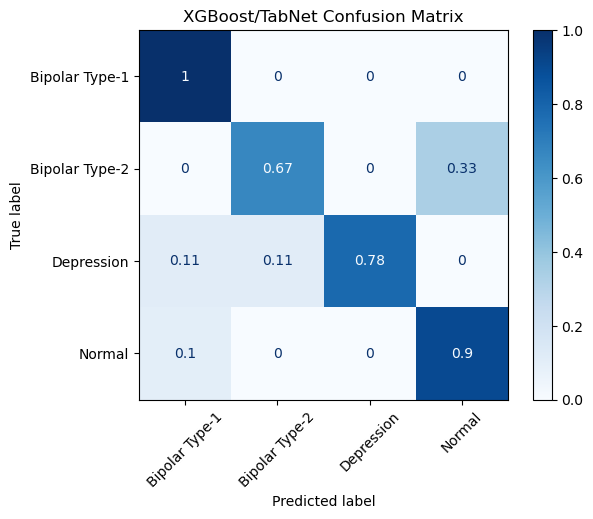

In [19]:
#create normalized confusion matrix
meta_cm_normalized = confusion_matrix(y_test_og, meta_pred_xgb_og, normalize='true')

#display confusion matrix
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=meta_cm_normalized, display_labels=label_encoder.classes_)
disp_normalized.plot(cmap=plt.cm.Blues)
plt.title('XGBoost/TabNet Confusion Matrix')
plt.xticks(rotation=45)
plt.show()